# KIDNEY DISEASE PREDICTION

## Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Loading the data set

In [2]:
dataset = pd.read_csv("C:/Users/avk/Downloads/kidney_disease.csv")

## Printing the dataset

In [3]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# DATA CLEANING

In [4]:
dataset = dataset.dropna(axis=0)

## Printing the columns of the dataset

In [5]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

## Printing the head of the dataset

In [6]:
dataset.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


## Printing the tail of the dataset

In [7]:
dataset.tail(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


## Printing the info of the dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    object 
 17  wc              158 non-null    obj

# ENCODING THE DATA

In [9]:
rbc = {"normal":1,"abnormal":0}
dataset['rbc'] = dataset.rbc.map(rbc)
dataset['rbc']


3      1
9      0
11     0
14     1
20     0
      ..
395    1
396    1
397    1
398    1
399    1
Name: rbc, Length: 158, dtype: int64

In [10]:
ane = {"yes":1,"no":0}
dataset['ane'] = dataset.ane.map(ane)
dataset['ane']

3      1
9      1
11     0
14     0
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: ane, Length: 158, dtype: int64

In [11]:
classification= {"notckd":0,"ckd":1}
dataset['classification'] = dataset.classification.map(classification)
dataset['classification']

3      1
9      1
11     1
14     1
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 158, dtype: int64

In [12]:
appet= {"good":1,"poor":0}
dataset['appet'] = dataset.appet.map(appet)
dataset['appet']

3      0
9      0
11     0
14     0
20     0
      ..
395    1
396    1
397    1
398    1
399    1
Name: appet, Length: 158, dtype: int64

In [13]:

pc= {"abnormal":0,"normal":1}
dataset['pc'] = dataset.pc.map(pc)
dataset['pc']



3      0
9      0
11     0
14     0
20     0
      ..
395    1
396    1
397    1
398    1
399    1
Name: pc, Length: 158, dtype: int64

In [14]:
pe = {"yes":1,"no":0}
dataset['pe'] = dataset.pe.map(pe)
dataset['pe']

3      1
9      0
11     1
14     1
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: pe, Length: 158, dtype: int64

In [15]:

# In[10]:


pcc= {"present":1,"notpresent":0}
dataset['pcc'] = dataset.pcc.map(pcc)
dataset['pcc']



3      1
9      1
11     1
14     1
20     0
      ..
395    0
396    0
397    0
398    0
399    0
Name: pcc, Length: 158, dtype: int64

In [16]:
ba= {"present":1,"notpresent":0}
dataset['ba'] = dataset.ba.map(ba)
dataset['ba']

3      0
9      0
11     0
14     1
20     0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ba, Length: 158, dtype: int64

In [17]:
htn= {"yes":1,"no":0}
dataset['htn'] = dataset.htn.map(htn)
dataset['htn']

3      1
9      1
11     1
14     1
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: htn, Length: 158, dtype: int64

In [18]:
dm= {"yes":1,"no":0}
dataset['dm'] = dataset.dm.map(dm)
dataset['dm']

3      0
9      1
11     1
14     1
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: dm, Length: 158, dtype: int64

In [19]:
cad= {"yes":1,"no":0}
dataset['cad'] = dataset.cad.map(cad)
dataset['cad']

3      0
9      0
11     0
14     1
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: cad, Length: 158, dtype: int64

In [20]:
dataset.head(4)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29,12100,3.7,1,1,0,0,0,1,1
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,32,4500,3.8,1,1,0,0,1,0,1
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,16,11000,2.6,1,1,1,0,1,0,1


# SPLITTING THE DATA

In [21]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify = dataset['classification'])

# ACCURACY METRICS

In [22]:
def content(name,y_test,pred):
    print(name)
    import seaborn as sns
    plt.title("Confusion matrix")
    sns.heatmap((confusion_matrix(y_test, pred)%100), annot=True, cmap="YlGn")
    plt.xlabel("pred")
    plt.ylabel("actua")
    plt.figure(figsize=(6,6))
    plt.show()
    
    conf_mat = (confusion_matrix(y_test,pred)%100)
    tn=conf_mat[0][0]
    fp=conf_mat[0][1]
    fn=conf_mat[1][0]
    tp=conf_mat[1][1]
    
    accuracy = (tn+tp)/(tn+tp+fn+fp)*100
    print(accuracy)
    sensitivity =  tp/(tp+fn) * 100
    print(sensitivity)
    specificity = tn/(tn+fp) * 100
    print(specificity)

## 1) ADABOOST CLASSIFIER

ADABOOST


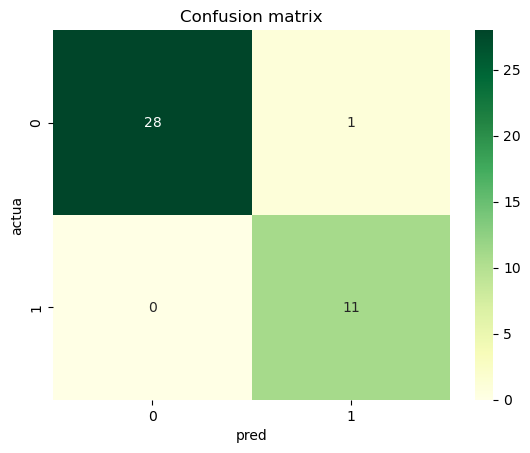

<Figure size 600x600 with 0 Axes>

97.5
100.0
96.55172413793103


In [23]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=1)
abc.fit(X_train,y_train)
pred = abc.predict(X_test)
content("ADABOOST",y_test,pred)

## 2) SUPPORT VECTOR MACHINE CLASSIFIER

SVM


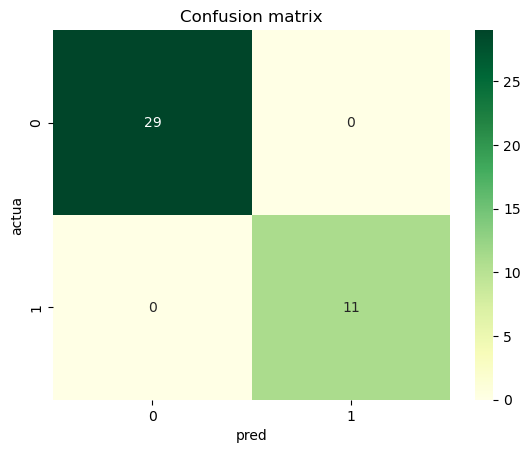

<Figure size 600x600 with 0 Axes>

100.0
100.0
100.0


In [24]:
from sklearn.svm import SVC
s=SVC(kernel = 'linear',random_state=42)
s.fit(X_train,y_train)
pred = s.predict(X_test)
content("SVM",y_test,pred)

## 3) K-NEAREST NEIGHBOR CLASSIFIER

KNN ALGORITHM


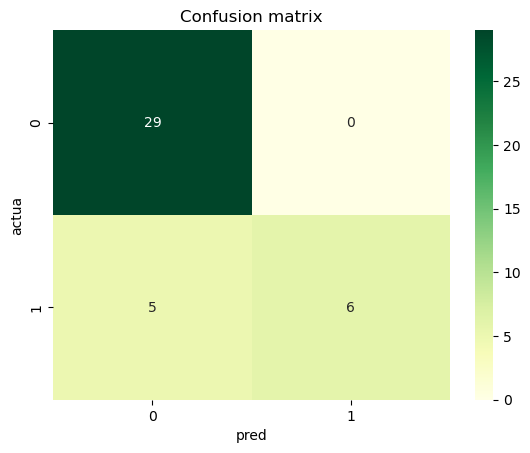

<Figure size 600x600 with 0 Axes>

87.5
54.54545454545454
100.0


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
content("KNN ALGORITHM",y_test,y_pred)

## 4) RANDOM FOREST CLASSIFIER

RANDOM FOREST CLASSIFIER


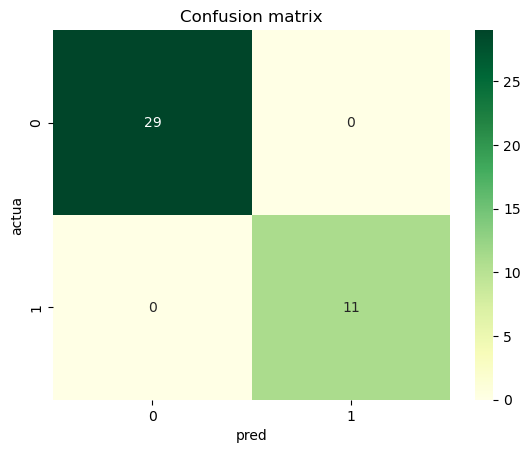

<Figure size 600x600 with 0 Axes>

100.0
100.0
100.0


In [26]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators = 11, criterion="entropy",random_state=42)
rand.fit(X_train,y_train)
pred = rand.predict(X_test)
content("RANDOM FOREST CLASSIFIER",y_test,pred)